In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
df=pd.read_csv('income.csv')
df.head()

,Nom,Age,Income
0,Rob,27,70000
1,Michael,29,72000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [3]:
scaler=MinMaxScaler()

In [4]:
scaler.fit(df[['Age']])
df['Age']=scaler.transform(df[['Age']])
scaler.fit(df[['Income']])
df['Income']=scaler.transform(df[['Income']])
df.head()

C:\Users\marouane\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\marouane\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,Nom,Age,Income
0,Rob,0.000000,0.076923
1,Michael,0.057143,0.092308
2,Mohan,0.057143,0.007692
3,Ismail,0.028571,0.000000
4,Kory,0.428571,0.692308


In [5]:
from sklearn.cluster import KMeans

kmeans=KMeans(n_clusters=3)
kmeans.fit(df[['Age','Income']])
df['cluster']=kmeans.labels_
df

,Nom,Age,Income,cluster
0,Rob,0.000000,0.076923,1
1,Michael,0.057143,0.092308,1
2,Mohan,0.057143,0.007692,1
3,Ismail,0.028571,0.000000,1
4,Kory,0.428571,0.692308,2
5,Sabri,0.371429,0.846154,2
6,Imen,0.600000,1.000000,2
7,Salma,0.800000,0.776923,2
8,Walid,0.771429,0.030769,0
9,Mounir,1.000000,0.026923,0


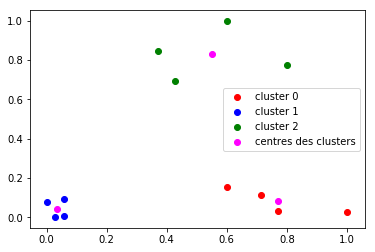

In [6]:
df0=df[df.cluster==0]
df1=df[df.cluster==1]
df2=df[df.cluster==2]
plt.scatter(df0.Age,df0.Income,c='red',label='cluster 0')
plt.scatter(df1.Age,df1.Income,c='blue',label='cluster 1')
plt.scatter(df2.Age,df2.Income,c='green',label='cluster 2')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],
            c='magenta',label='centres des clusters')
plt.legend()
plt.show()